## Task 1: Advanced Objective Function and Use Case

### 1. Log Reg Objective Function Derivation

In [4]:
%%latex
\begin{align}
    \text{Using MLE we start with a Bernoulli Distribution} \newline
    P(y = 1 | x, \theta) = h_\theta(x) \newline
    P(y = 0 | x, \theta) = 1 - h_\theta(x) \newline

    \newline


    \text{This brings us to the Probability Mass Function} \newline
    P(y | x, \theta) = (h_\theta(x))^y (1 - h_\theta(x))^{1-y} \newline

    \newline

    \text{The Likelihood Function is then} \newline
    L(\theta) = \prod_{i = 1}^{m} P(y^{(i)} | x^{(i)}, \theta) = \prod_{i = 1}^{m} (h_\theta(x^{(i)}))^{y^{(i)}} (1 - h_\theta(x^{(i)}))^{1-y^{(i)}} \newline


    \newline
    \text{The Log-Likelihood Function is} \newline
    l(\theta) = log L(\theta) = \sum_{i = 1}^{m} [y^{(i)} log(h_\theta(x^{(i)})) + (1-y^{(i)}) log(1-h_\theta(x^{(i)}))] \newline
    

    \newline
    \text{Now we minimize the cost using the objective function} \newline
    J(\theta) = -\frac{1}{m} l(\theta) \newline
    J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [(y^{(i)}) log(h_\theta(x^{(i)})) + (1-y^{(i)}) log(1-h_\theta(x^{(i)}))]

\end{align}


<IPython.core.display.Latex object>

### 2. Defining Machine Learning Problem
- A problem which I would like to sovle using logistic regression would leverage a binary output, so some for of classification. Credit card fraud detection could be a cool problem to solve with logisic regression as it is a classification problem. Given a few transactions we should be able to identify each as either fraud or not fraud. We could compare this to a linear SVM will form a differnt type of classification as it will try to maximize the margin between the two classed (fraud, not fraud) while logisitc regression will try to maximize the likelihood of the data. The SVM might perform better as it will not be as affected as outliers as much as Logistic Regression will. Logisitic Regression is a good starting point as we will be able to explain what features led to the classification while SVMs act more as a black box. 

### 3. Discuss how dataset corresponds to equation vars
- Theta -> model weights which we will derive after training
- x^(i) -> input features which come from the dataset features
- y^(i) -> target labels which come from the dataset class (fraud, not fraud) 
- h_theta(x^(i)) -> model prediction

## Task 2: Dataset and Advanced EDA

In [5]:
import numpy as np
import pandas as pd
import kagglehub

# Data at https://www.kaggle.com/datasets/mlg-ulb/creditcardataraud/data
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

Using Colab cache for faster access to the 'creditcardfraud' dataset.


In [6]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')


In [7]:
data.head()
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data.isnull().sum().max()

0

In [9]:
print('No Frauds', round(data['Class'].value_counts()[0] / len(data) * 100, 2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1] / len(data) * 100, 2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
vif_data = pd.DataFrame()
vif_data['feature'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print(vif_data)

   feature        VIF
0     Time   2.339858
1       V1   1.638237
2       V2   3.900804
3       V3   1.321018
4       V4   1.172479
5       V5   2.764441
6       V6   1.528629
7       V7   2.603517
8       V8   1.098591
9       V9   1.037715
10     V10   1.208870
11     V11   1.080378
12     V12   1.154440
13     V13   1.003473
14     V14   1.219562
15     V15   1.014148
16     V16   1.080994
17     V17   1.227258
18     V18   1.033900
19     V19   1.040800
20     V20   2.233935
21     V21   1.103107
22     V22   1.082408
23     V23   1.149293
24     V24   1.000773
25     V25   1.013526
26     V26   1.000539
27     V27   1.009509
28     V28   1.001595
29  Amount  11.507919
30   Class   2.093512


In [15]:
# handling highly corrolated features: Amount
# plan to log transform and standardize Amount feature
data['Log_Amount'] = np.log1p(data['Amount'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Scaled_Amount'] = scaler.fit_transform(data['Log_Amount'].values.reshape(-1,1))
data = data.drop(['Amount','Log_Amount'], axis=1)

In [17]:
vif_data = pd.DataFrame()
vif_data['feature'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print(vif_data)

KeyboardInterrupt: 

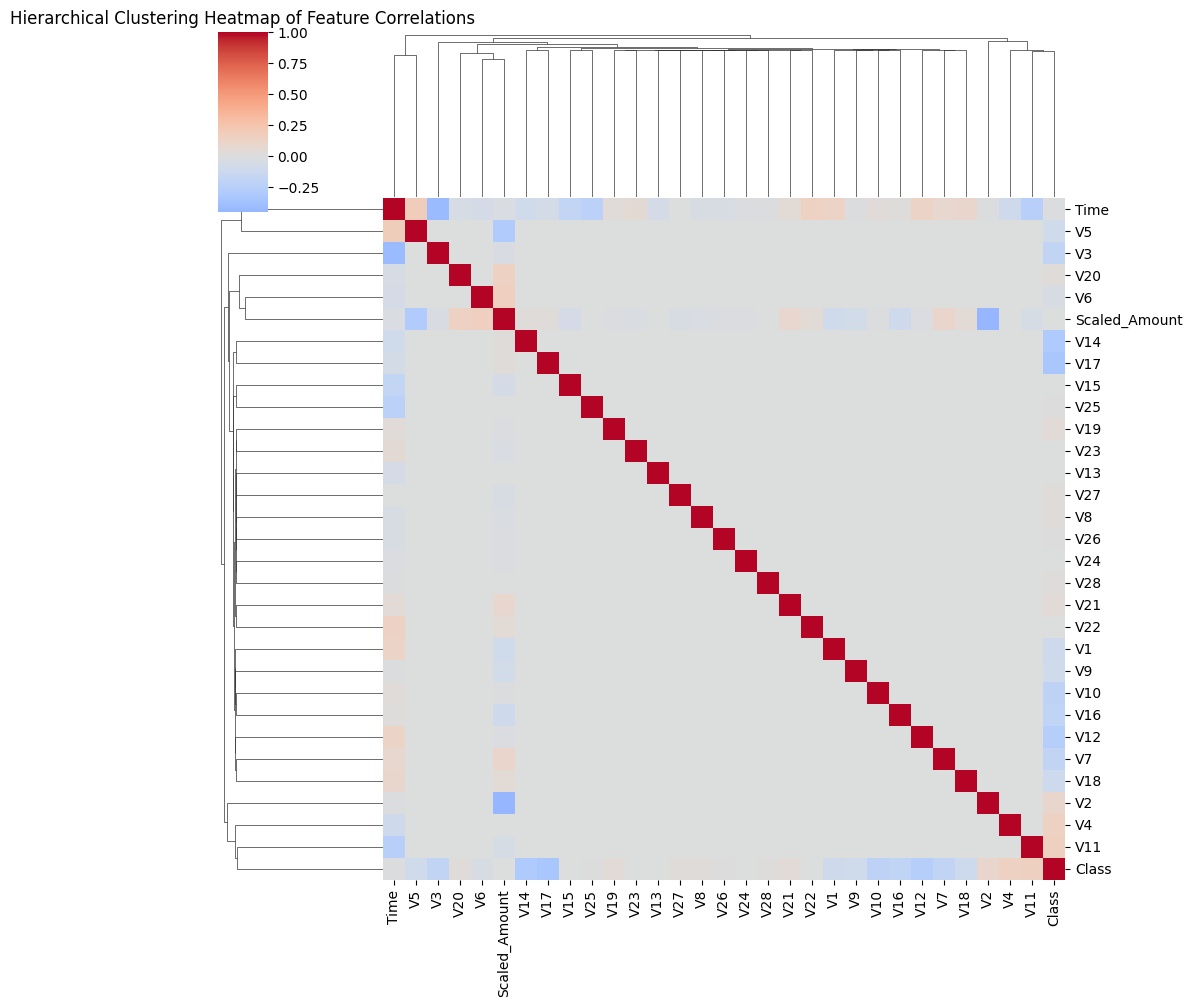

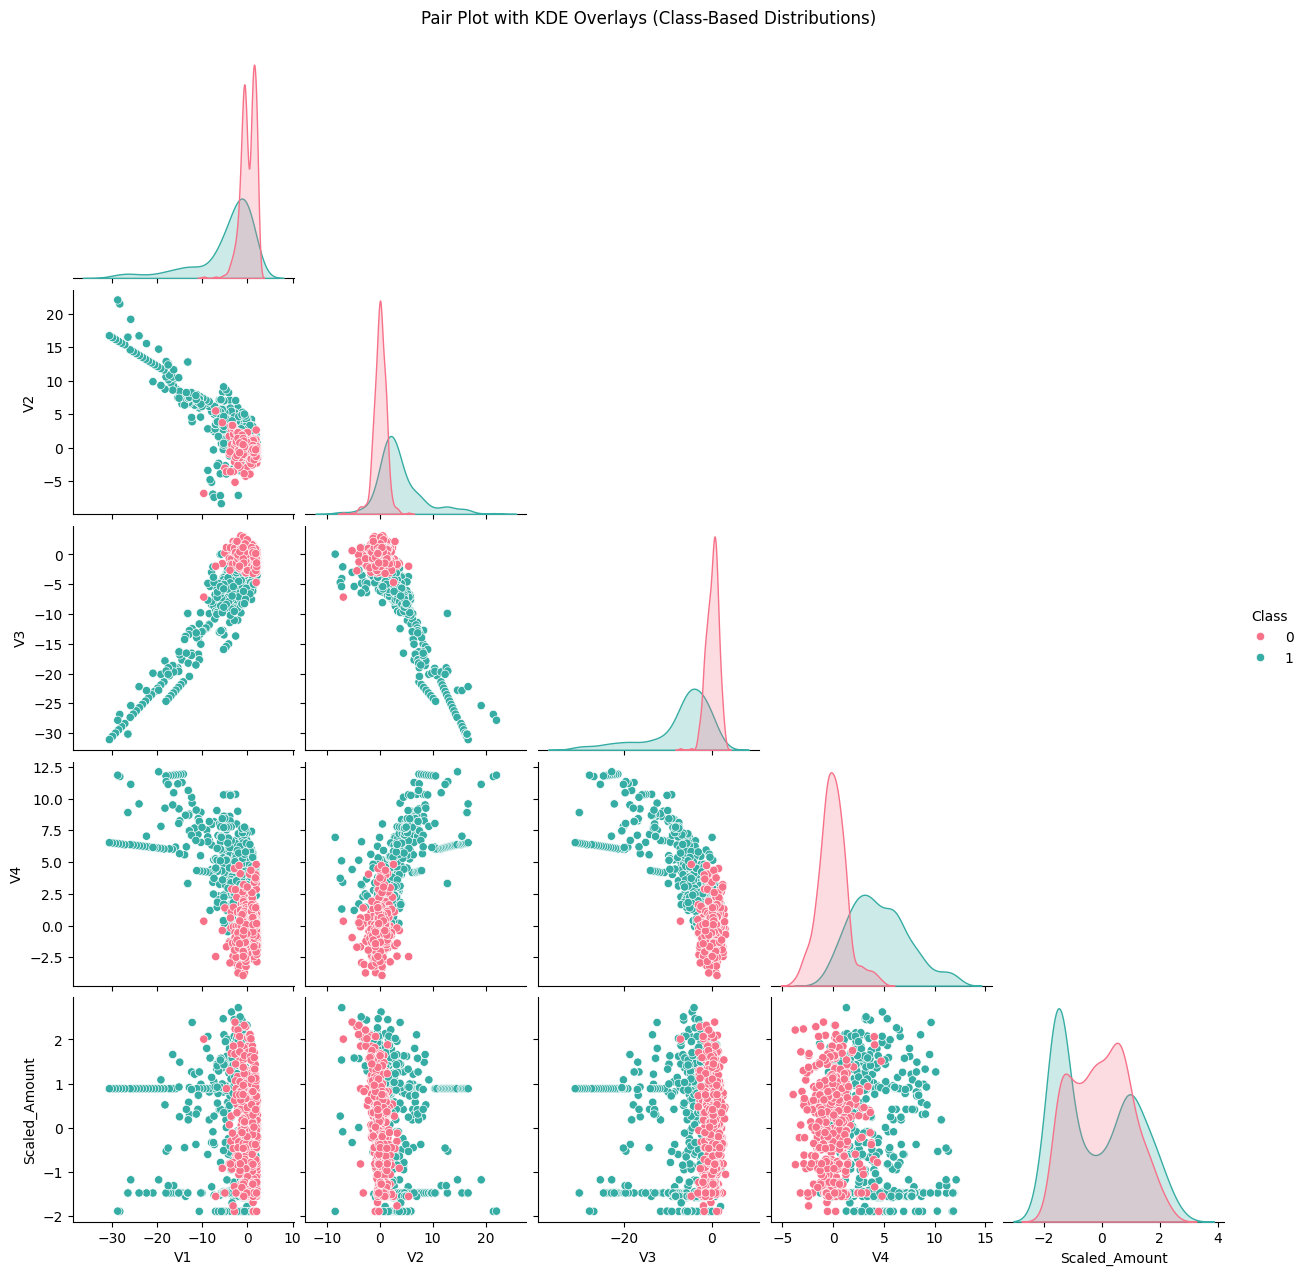

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Clustermap
corr_matrix = data.corr()
sns.clustermap(corr_matrix, 
               cmap='coolwarm', 
               center=0, 
               annot=False, 
               figsize=(10, 10))
plt.title('Hierarchical Clustering Heatmap of Feature Correlations')
plt.savefig('clustermap.png')

# KDE
# subsampling
subset_features = ['V1', 'V2', 'V3', 'V4', 'Scaled_Amount', 'Class']
fraud_indices = data[data.Class == 1].index
genuine_indices = data[data.Class == 0].sample(len(fraud_indices)).index
sampled_data = data.loc[fraud_indices.append(genuine_indices)]

sns.pairplot(sampled_data[subset_features], 
             hue='Class', 
             diag_kind='kde', 
             palette='husl', 
             corner=True)
plt.suptitle('Pair Plot with KDE Overlays (Class-Based Distributions)', y=1.02)
plt.savefig('pairplot_kde.png')

## Task 3: Logistic Regression Implementation

In [48]:
from scipy.special import softmax
import time

def stochastic_grad_desc(W, X, Y_onehot, lr, max_iters, e, class_weights):
    n_samples = X.shape[0]
    loss_history = []
    start_time = time.time()

    w_scale = np.array(list(class_weights.values())).reshape(-1, 1)

    # Record initial loss
    initial_loss = compute_loss(W, X, Y_onehot)
    loss_history.append(initial_loss)
    print(f'Initial Loss: {initial_loss}')

    for t in range(max_iters):
        W_prev = W.copy()
        for i in np.random.permutation(n_samples):
            xi = X[i]       
            yi = Y_onehot[i] 

            probs = softmax(W @ xi) 

            # error
            error = (probs - yi) 

            # update weights
            W -= lr * (w_scale * np.outer(error, xi))

        current_loss = compute_loss(W, X, Y_onehot)
        loss_history.append(current_loss)
        if t % 1 == 0:
             print(f'Epoch {t}: Loss {current_loss}')

        if np.linalg.norm(W - W_prev) <= e:
            print(f'Converged at epoch {t}')
            break
            
    total_time = time.time() - start_time
    return W, loss_history, total_time

def mini_batch_grad_desc(W, X, Y_onehot, lr, max_iters, e, class_weights, batch_size=64):
    n_samples = X.shape[0]
    loss_history = []
    start_time = time.time()
    w_scale = np.array(list(class_weights.values())).reshape(-1, 1)

    # Record initial loss
    initial_loss = compute_loss(W, X, Y_onehot)
    loss_history.append(initial_loss)
    print(f'Initial Loss: {initial_loss}')

    for t in range(max_iters):
        W_prev = W.copy()
    
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        Y_shuffled = Y_onehot[indices]
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i + batch_size] 
            Y_batch = Y_shuffled[i:i + batch_size] 

            # forward pass
            scores = X_batch @ W.T
            probs = softmax(scores, axis=1)

            # compute gradient
            grad = (probs - Y_batch).T @ X_batch
            
            # dividing by batch size
            W -= (lr / batch_size) * (w_scale * grad)

        current_loss = compute_loss(W, X, Y_onehot)
        loss_history.append(current_loss)
        if t % 1 == 0:
             print(f'Epoch {t}: Loss {current_loss}')

        # convergence check
        if np.linalg.norm(W - W_prev) <= e:
            print(f'Converged at epoch {t}')
            break
            
    total_time = time.time() - start_time
    return W, loss_history, total_time

def batch_grad_desc(W, X, Y_onehot, lr, max_iters, e, class_weights):
    n_samples = X.shape[0]
    loss_history = []
    start_time = time.time()
    w_scale = np.array(list(class_weights.values())).reshape(-1, 1)

    # Record initial loss
    initial_loss = compute_loss(W, X, Y_onehot)
    loss_history.append(initial_loss)
    print(f'Initial Loss: {initial_loss}')

    for t in range(max_iters):
        W_prev = W.copy()

        # forward pass
        scores = X @ W.T
        probs = softmax(scores, axis=1)

        # global gradient
        grad = (probs - Y_onehot).T @ X
        
        # average gradient using our scaled weights
        W -= (lr / n_samples) * (w_scale * grad)

        current_loss = compute_loss(W, X, Y_onehot)
        loss_history.append(current_loss)
        if t % 1 == 0:
             print(f'Epoch {t}: Loss {current_loss}')

        # convergence check 
        if np.linalg.norm(W - W_prev) <= e:
            print(f"Converged at epoch {t}")
            break
            
    total_time = time.time() - start_time
    return W, loss_history, total_time

def compute_loss(W, X, Y_onehot):
    n = X.shape[0]
    probs = softmax(X @ W.T, axis=1)
    loss = -np.sum(Y_onehot * np.log(probs + 1e-9)) / n
    return loss

In [49]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

def log_reg(X, Y, n=0.01, e=1e-5, max_iters=100, lr = 0.01, gradient_method='sgd', W_init=None):
    # data split
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2
    )

    n, d = X_train.shape
    K = 2

    # map to Rd+1
    X_hat = np.c_[np.ones(n), X_train]

    # k dim bernoulli vetor
    Y_onehot = np.eye(K)[Y_train]

    # init weight vector
    if W_init is None:
        W = np.random.randn(K, d + 1)
    else:
        W = W_init.copy()

    # optimizing for the class imbalance
    weights = {0: 1.0, 1: 50.0}
    
    loss_history = []
    exec_time = 0

    if gradient_method == 'mini-batch':
        W, loss_history, exec_time = mini_batch_grad_desc(W, X_hat, Y_onehot, lr, max_iters, e, weights, batch_size=64)
    elif gradient_method == 'sgd':  
        W, loss_history, exec_time = stochastic_grad_desc(W, X_hat, Y_onehot, lr, max_iters, e, weights)
    elif gradient_method == 'batch':
        W, loss_history, exec_time = batch_grad_desc(W, X_hat, Y_onehot, lr, max_iters, e, weights)

    print("W:")
    print(W)

    # evaluation on test data
    X_test_hat = np.c_[np.ones(X_test.shape[0]), X_test]
    scores_test = X_test_hat @ W.T
    probs_test  = softmax(scores_test, axis=1)
    y_pred      = np.argmax(probs_test, axis=1)

    acc = accuracy_score(Y_test, y_pred)
    f1  = f1_score(Y_test, y_pred, average='macro')

    print("Test size:", len(Y_test))
    print("Accuracy on test data:", acc)
    print("F1 score on test data:", f1)
    print("Execution time:", exec_time)

    return W, acc, f1, loss_history, exec_time



Running batch gradient descent...
Initial Loss: 3.759041232496696
Epoch 0: Loss 1.650370175829918
Epoch 1: Loss 0.5906136301369063
Epoch 2: Loss 0.23259993337273904
Epoch 3: Loss 0.12338524716310979
Epoch 4: Loss 0.08910436481569868
Epoch 5: Loss 0.07147735170497098
Epoch 6: Loss 0.05972326660621232
Epoch 7: Loss 0.05112313393493275
Epoch 8: Loss 0.04458310393762931
Epoch 9: Loss 0.03949056430462456
Epoch 10: Loss 0.035438623659022554
Epoch 11: Loss 0.03216256096210657
Epoch 12: Loss 0.029455547328699278
Epoch 13: Loss 0.027147855782101896
Epoch 14: Loss 0.025140165744436012
Epoch 15: Loss 0.02340550354648947
Epoch 16: Loss 0.021906603154013486
Epoch 17: Loss 0.02057772392977491
Epoch 18: Loss 0.01940785674486654
Epoch 19: Loss 0.018376608538929487
Epoch 20: Loss 0.017457302113828028
Epoch 21: Loss 0.016648482197567836
Epoch 22: Loss 0.015913995378802753
Epoch 23: Loss 0.015241837994006364
Epoch 24: Loss 0.014621435104018038
Epoch 25: Loss 0.014037497683545602
Epoch 26: Loss 0.0134904

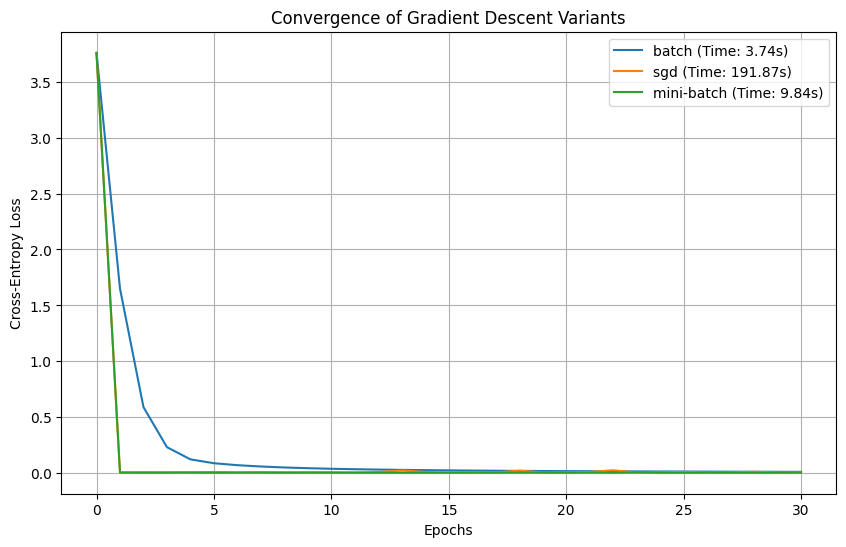

In [50]:
X_data = data.drop(columns=['Class', 'Time']) 
Y_data = data['Class']

# 2. Scale (Highly recommended for many features)
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X_data)

import matplotlib.pyplot as plt

# Run experiments
methods = ['batch', 'sgd', 'mini-batch']
rates = [0.1, 0.001, 0.01]
results = {}

# Initialize shared weights
n_features = X_scaled.shape[1]
K = 2
W_init = np.random.randn(K, n_features + 1)

for method, rate in zip(methods, rates):
    print(f"\nRunning {method} gradient descent...")
    # Using fewer iterations for demonstration; increase max_iters for full convergence
    W, acc, f1, loss_hist, t_exec = log_reg(X_scaled, Y_data.values, max_iters=30, lr = rate, gradient_method=method, W_init=W_init)
    results[method] = {'loss': loss_hist, 'time': t_exec, 'acc': acc, 'f1': f1}

# Plotting Loss Convergence
plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(results[method]['loss'], label=f"{method} (Time: {results[method]['time']:.2f}s)")

plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Convergence of Gradient Descent Variants')
plt.legend()
plt.grid(True)
plt.show()